In [24]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.7/site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
### Loading the Loan Train Dataset and Printing the Dimensions

train=pd.read_csv('loan_train.csv')
print("Shape of Train :", train.shape)

Shape of Train : (614, 13)


In [4]:
### Loading the Loan Test Dataset and Printing the Dimensions

test=pd.read_csv('loan_test.csv')
print("Shape of Test :",test.shape)

Shape of Test : (367, 12)


In [5]:
### Data Visualization of Train Dataset

train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
### Train Dataset Description

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
### Train Dataset Information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
### Train Dataset Columns

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
### Datatypes of Different Columns in Train Dataset

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
### Checking the Missing Values in Train Dataset

train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
### Data Visualization of Test Dataset

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
### Test Dataset Description

test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [14]:
### Test Dataset Information

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [15]:

### Test Dataset Columns

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
### Datatypes of Different Columns in Test Dataset

test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [17]:
### Checking the Missing Values in Test Dataset

test.isnull().any()


Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [18]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [19]:

### Combining the Train and Test Datasets

# Making a 'Loan_Status' column in the Test Dataset with NaN values
test['Loan_Status'] = 0

# Combining Train and Test Datasets
combined = pd.concat([train, test])

# Checking the Shape of the Combined Dataset
print("Shape of Combined Dataset :", combined.shape)

Shape of Combined Dataset : (981, 13)


In [20]:
### Data Visualization of Combined Dataset

combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


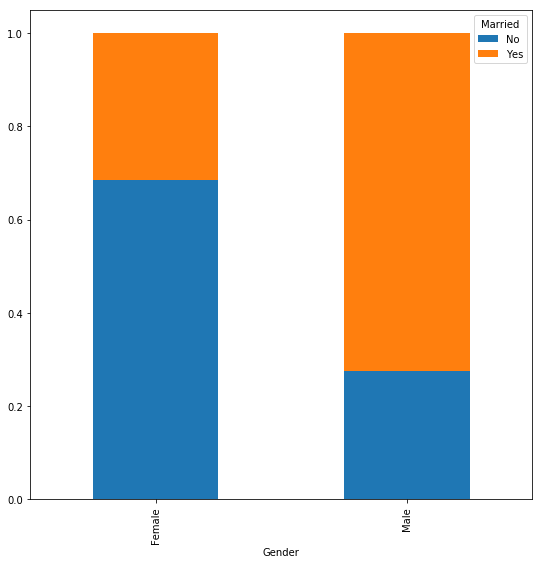

In [43]:
### Comparison of Gender vs Marriage Status

Gender = pd.crosstab(combined['Gender'], combined['Married'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (9, 9))

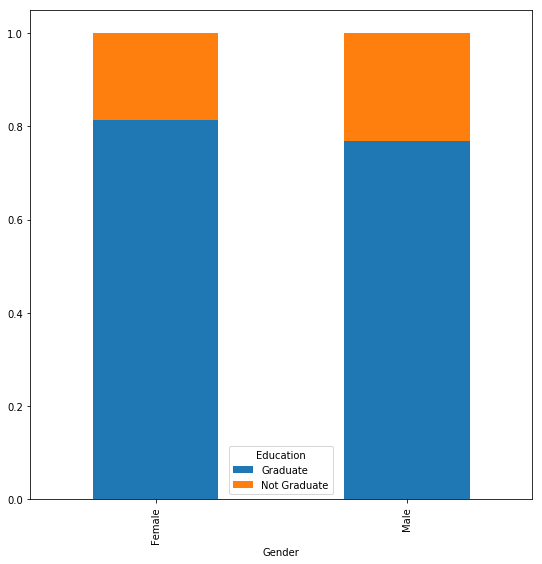

In [44]:
### Comparison of Gender vs Education Level

Gender = pd.crosstab(combined['Gender'], combined['Education'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (9, 9))

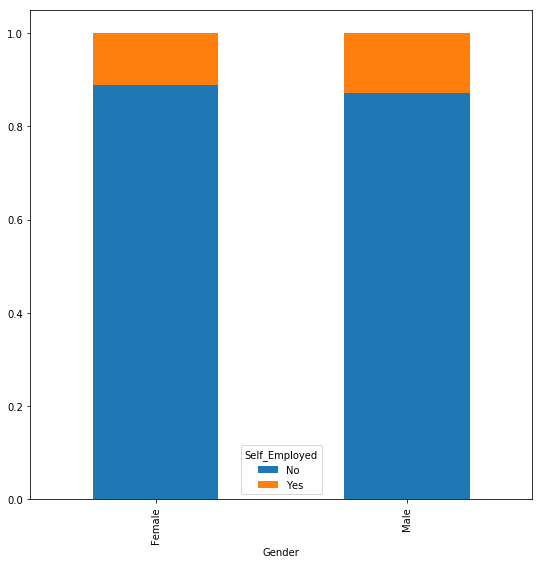

In [45]:
### Comparison of Gender vs Self Employment

Gender = pd.crosstab(combined['Gender'], combined['Self_Employed'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (9, 9))

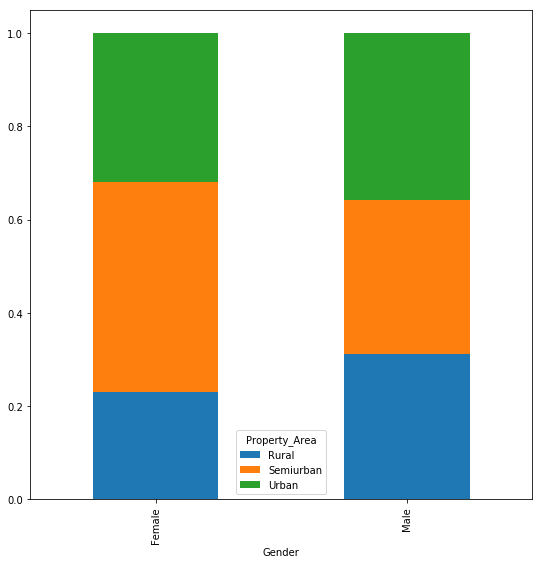

In [46]:
### Comparison of Gender vs Property Area

Gender = pd.crosstab(combined['Gender'], combined['Property_Area'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (9, 9))


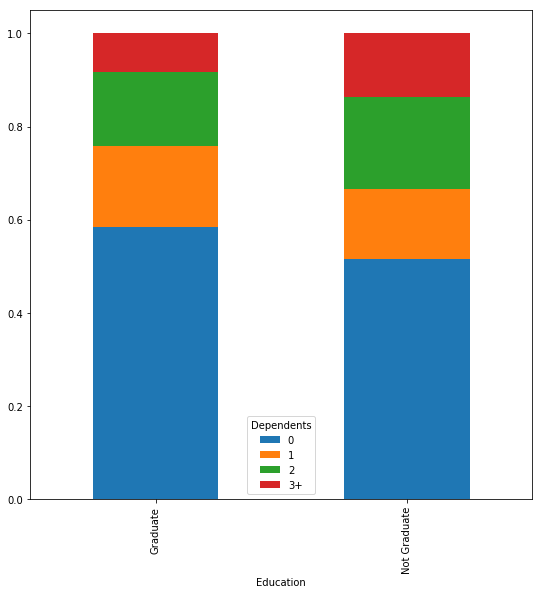

In [47]:
### Comparison of Education Level vs Dependants

Education = pd.crosstab(combined['Education'], combined['Dependents'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (9, 9))

In [48]:

### Imputing the missing values in Train Dataset

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [49]:

### Imputing the missing values in Test Dataset

test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Married'].fillna(train['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [50]:
### Removing Unnecassary Columns

train = train.drop(columns = 'Loan_ID')
test = test.drop(columns = 'Loan_ID')

print(train.shape)
print(test.shape)

(614, 12)
(367, 12)


In [51]:
### Splitting the Train Dataset into x and y variables

x = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [52]:
### Converting Categorical Variables into Numerical Values

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(x.shape)

(614, 20)


In [53]:
### Splitting x and y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 20)
(429,)
(185, 20)
(185,)


In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train)*100)
print("Testing Accuracy :", model.score(x_test, y_test)*100)

Training Accuracy : 80.41958041958041
Testing Accuracy : 83.24324324324324


/home/adarsh/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train)*100)
print("Testing Accuracy :", model.score(x_test, y_test)*100)

Training Accuracy : 67.5990675990676
Testing Accuracy : 72.43243243243244


In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train)*100)
print("Testing Accuracy :", model.score(x_test, y_test)*100)

Training Accuracy : 100.0
Testing Accuracy : 70.8108108108108


In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train)*100)
print("Testing Accuracy :", model.score(x_test, y_test)*100)

Training Accuracy : 100.0
Testing Accuracy : 80.54054054054053


In [58]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier()
model.fit(x_train,y_train)

knn_prediction = model.predict(x_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test)*100)

KNN accuracy =  62.70270270270271


In [59]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 12  39]
 [ 30 104]]
              precision    recall  f1-score   support

           N       0.29      0.24      0.26        51
           Y       0.73      0.78      0.75       134

    accuracy                           0.63       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.61      0.63      0.62       185



Text(0, 0.5, 'Error Rate')

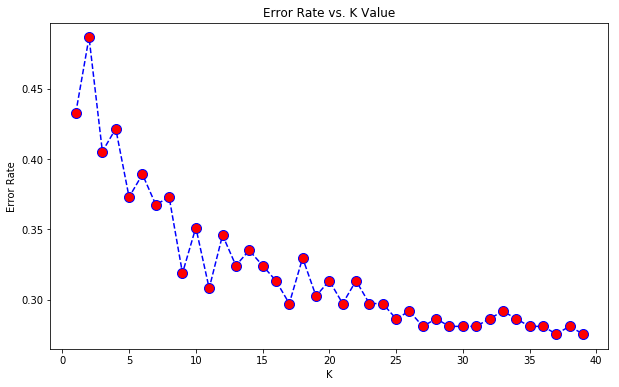

In [60]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')